# Programa Ingenias+ Data Science




## Analisis Exploratorio de un Dataset

Esta notebook les permitiria ejercitar los conceptos de Pandas 🐼  y Análisis exploratorio de datos 📊 que aprendimos hasta ahora. Vamos a trabajar con un dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers). En el Drive esta descargado el archivo. Si tenes inconvenientes o  ese archivo no funciona podes descargarlo directamente de la página web.

### 🔬 Comenzando el proyecto 🎉

Es tu primer dia como Data Scientist. Tu primer proyecto consiste en hacer un análisis de datos sobre clientes de un centro comercial para luego hacer una predicción de ventas o un analisis de cluster. Antes que nada, debes inspeccionar y visualizar tu dataset para saber con que datos estas trabajando.

Como mencionamos durante la clase, una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como _"Analisis exploratorio de los datos"_.

Además de obtener que tipo de datos contiene el dataset, estadistica descriptiva, detectar problemas como valores faltantes, establecer que tipo de relación existe entre las distintas variables, también debemos visualizar los datos. Este análisis nos permitira hacernos preguntas que puedan ser contestadas con el dataset como así plantear estrategias para poder resolver problemas presentes en él.

#### IMPORTA LAS LIBRERIAS NECESARIAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
import sklearn

#### LEE LOS DATOS

**_Lee los datos que se encuentran en el archivo `clientes_mall.csv`. Guardalos en un DataFrame._**

In [4]:
Mall = pd.read_csv('Mall_Customers.csv')

#### INSPECCIONA LOS DATOS

Primero obtene una visión general del dataset:


🤔 &nbsp; **_¿Como se ven las primeras 5 filas? ¿Cuantas filas y columnas posee? ¿Que tipos de datos contiene cada una de las columnas?_**

In [5]:
Mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
Mall.shape

(200, 5)

In [7]:
Mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
Mall.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**_Hay algunas columnas que tienen nombres incomodos (ej. `Spending Score (1-100)` y `Annual Income (k$)`). Renombra esas columnas_**

In [9]:
Mall.rename(columns = {"Spending Score (1-100)":"Puntaje de gastos", "Annual Income (k$)":"Ingreso Anual"}, inplace=True) #Cambio los nombre de las columnas

In [10]:
Mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Ingreso Anual', 'Puntaje de gastos'], dtype='object')

#### Valores faltantes

🤔 &nbsp; **_¿Hay valores faltantes en alguna de las columnas?_**

In [11]:
Mall.isna().sum()

CustomerID           0
Genre                0
Age                  0
Ingreso Anual        0
Puntaje de gastos    0
dtype: int64

**_Elimina todas las filas que tengan valores faltantes_**

In [12]:
#En este dataframe no tengo datos vacíos 

#### FILTRA LOS DATOS

Porque tu compañia quiere diseñar un a campaña de marketing especial para personas entre 25 y 40 años, vamos a analizar los datos solo para estos clientes.

🤔 &nbsp; **_Chequea que categorias aparecen en la columna `Age`_**.

In [13]:
Mall['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

**_Filtra los datos para quedarte unicamente con las filas que correspondan a personas entre 25 y 40 años. Guardalo en una variable que se llame `clientes_seleccionados`._**

In [14]:
clientes_seleccionados = Mall[(Mall['Age'] >= 25) & (Mall['Age'] <= 40)]

In [15]:
clientes_seleccionados

,CustomerID,Genre,Age,Ingreso Anual,Puntaje de gastos
4,5,Female,31,17,40
6,7,Female,35,18,6
9,10,Female,30,19,72
11,12,Female,35,19,99
14,15,Male,37,20,13
...,...,...,...,...,...
193,194,Female,38,113,91
195,196,Female,35,120,79
197,198,Male,32,126,74
198,199,Male,32,137,18


**_Reiniciamos el indice usando `reset_index()` para que las filas vuelvan a ser numeradas a partir de 0. `drop=True` permite descartar los indices anteriores y no guardarlos como una nueva columna. `inplace=True` permite que se modifique el DataFrame original._**

In [16]:
clientes_seleccionados.reset_index(drop=True , inplace=True)

In [17]:
print(clientes_seleccionados.head())
print(clientes_seleccionados.shape)

   CustomerID   Genre  Age  Ingreso Anual  Puntaje de gastos
0           5  Female   31             17                 40
1           7  Female   35             18                  6
2          10  Female   30             19                 72
3          12  Female   35             19                 99
4          15    Male   37             20                 13
(87, 5)


**_Obtene estadistica descriptiva para las columnas que corresponden al salario anual y puntaje de gastos de las personas entre 25 y 40 años. Lo importante es que se muestre promedio, mediana, desvio estandard, valores minimos y maximos._**

In [18]:
clientes_seleccionados[['Puntaje de gastos', 'Ingreso Anual']].describe() #Describe me da la cantidad de datos, el promedio, el minimo maximo y promedio estandar

,Puntaje de gastos,Ingreso Anual
count,87.000000,87.000000
mean,60.517241,68.712644
std,26.933537,28.362237
min,1.000000,17.000000
25%,41.000000,47.000000
50%,69.000000,73.000000
75%,83.000000,87.000000
max,99.000000,137.000000


🤔 &nbsp; De acuerdo a los valores **_¿Cuál es el sueldo promedio de estos clientes? ¿Cual es el puntaje de gastos mediano en el grupo? ¿Crees que son buenas medidas para caracterizar el grupo?_**

El sueldo promedio de los clientes es de 68700 USD anuales. La mediana es igual al percentil 50 y se trata de 69 en puntaje de gastos.

El valor de promedio puede verse sesgado por valores muy extremos por lo que puede no ser tan representativo

**_Compara estos valores con aquellos de los clientes en general._**

In [19]:
Mall[['Puntaje de gastos', 'Ingreso Anual']].describe()

,Puntaje de gastos,Ingreso Anual
count,200.000000,200.000000
mean,50.200000,60.560000
std,25.823522,26.264721
min,1.000000,15.000000
25%,34.750000,41.500000
50%,50.000000,61.500000
75%,73.000000,78.000000
max,99.000000,137.000000


#En linea general, el promedio y la medio de los clientes en general son menores considerando que hay personas en edades tempranas y otras jubiladas con menores ingresos

**_Obtiene la edad promedio de clientes que tienen un sueldo mayor al promedio._**

In [20]:
adin0 = clientes_seleccionados[clientes_seleccionados['Ingreso Anual'] > 68] #Filtramos los datos en la tabla de los que tienen mayores ingresos
ages_adin0 = adin0['Age'] #Necesitamos las edades de aquellos que tengan ,ayores ingresos

In [21]:
print(ages_adin0.mean()) #En promedio los que tienen ingresos mayores al promedio poseen 33 años

32.943396226415096


**_Compara estos valores con aquellos de los clientes en general._**

In [22]:
adin = Mall[Mall['Ingreso Anual'] > 60] #Filtramos los datos en la tabla de los que tienen mayores ingresos
ages_adin = adin['Age'] #Necesitamos las edades de aquellos que tengan ,ayores ingresos
print(ages_adin.mean()) #En promedio los que tienen ingresos mayores al promedio poseen 38 años

37.872549019607845


🤔 &nbsp; **_¿Qué otras preguntas te surgen para analizar en este dataset?_**

Con este dataset se puede analizar el ingreso por generero y en base a eso el puntaje de gastos, sumado a separar por edades y ver eso mismo 

#### VISUALIZA LOS DATOS

**_Visualiza la distribución de las variables de sueldo promedio y puntaje de gastos. Haz gráficos que superpongan la distribución de cada una de estas variables de manera global como también sólo para los clientes seleccionados._**

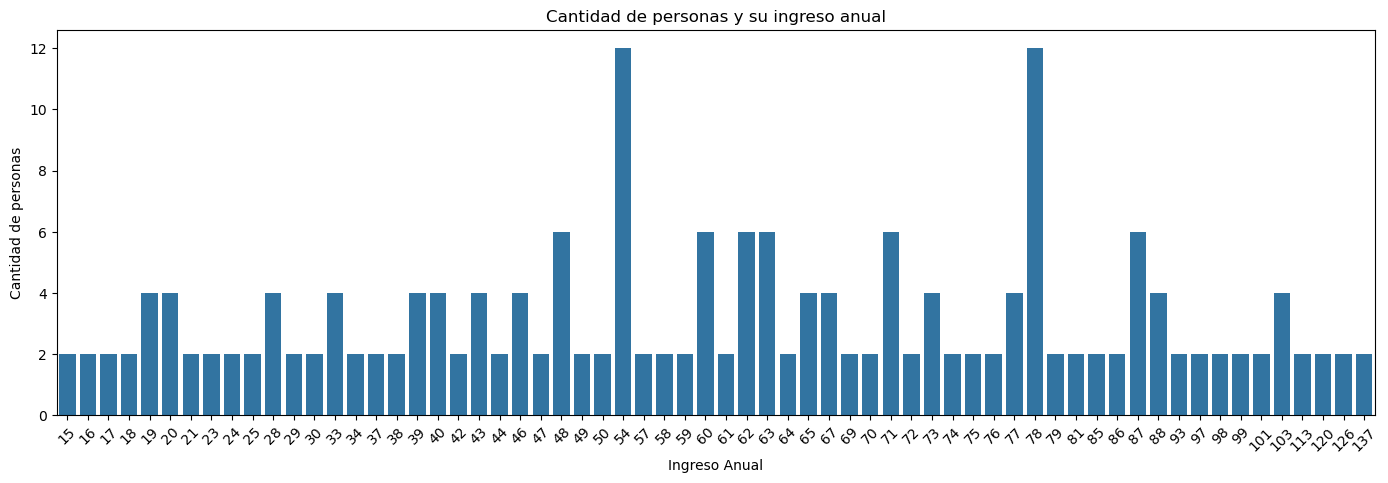

In [23]:
plt.figure(figsize=(17, 5))
sns.countplot(x="Ingreso Anual", data=Mall) #Abcisa en ingreso anual y ordenada en la contabilizacion de los datos
# Me da la cantidad de personas que ganan esa cantidad de plata
plt.xlabel('Ingreso Anual')
plt.ylabel('Cantidad de personas')
plt.title('Cantidad de personas y su ingreso anual')
plt.xticks(rotation=45)
plt.show()
#sns.despine() #Elimina el recuadro alrededor del grafico

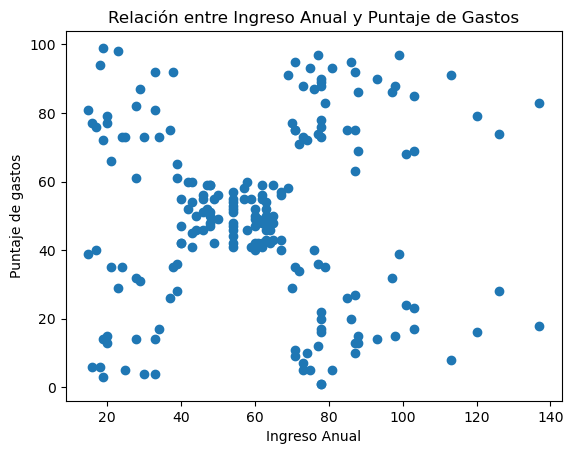

In [24]:
plt.scatter(Mall['Ingreso Anual'], Mall['Puntaje de gastos']) #Esto da un diagrama de dispersion que relaciona ambas variables
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de gastos')
plt.title('Relación entre Ingreso Anual y Puntaje de Gastos')
plt.show()

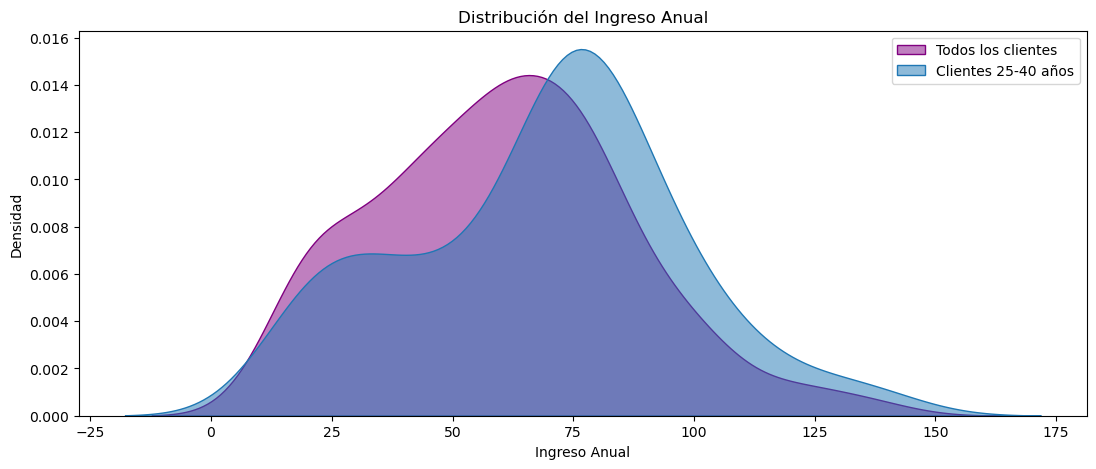

In [25]:
plt.figure(figsize=(13, 5)) #Crea una figura de 13 unidades de ancho por 5 de alto. Sirve para escalar la figura, pero los datos no cambian
# Esto define el espacio donde se van a dibujar los gráficos.
sns.kdeplot(data=Mall, x='Ingreso Anual', color='purple', label='Todos los clientes', fill=True, alpha=0.5) #Grafica una funcion de densidad con valores normalizados
# En este caso, grafica una fuencion de densidad para el ingreso anual de todos, el fill es para que rellene al area abajo de la curva
# Alpha igual a 0.5 hace que el color sea transparente, para que se pueda ver la superposicion 
sns.kdeplot(data=clientes_seleccionados, x='Ingreso Anual', label='Clientes 25-40 años', fill=True, alpha=0.5)
#Hace lo mismo de arriba pero para los clientes seleccionado
plt.title('Distribución del Ingreso Anual')
plt.xlabel('Ingreso Anual')
plt.ylabel('Densidad')
plt.legend()
plt.show()

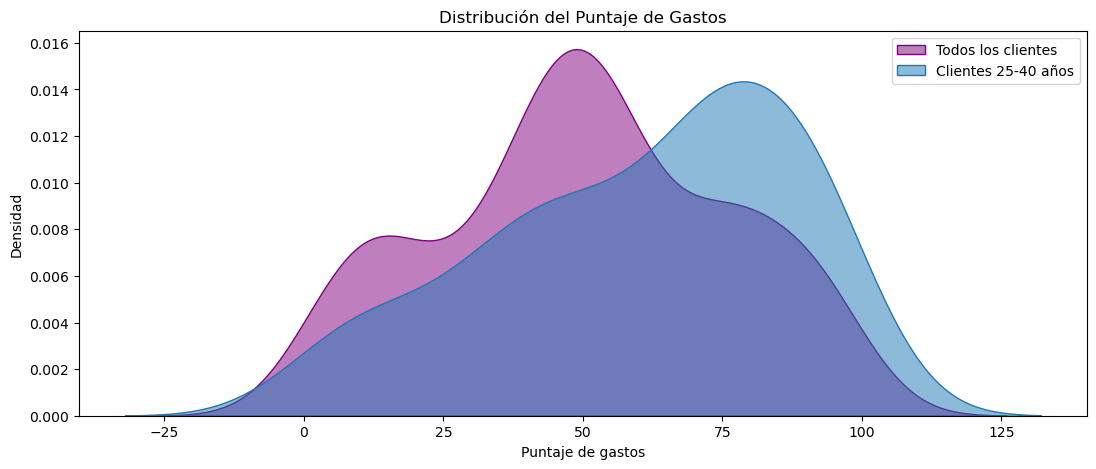

In [26]:
#Hace lo mismo de arriba pero con puntaje de gastos
plt.figure(figsize=(13, 5))
sns.kdeplot(data=Mall, x='Puntaje de gastos', color='purple',label='Todos los clientes', fill=True, alpha=0.5)
sns.kdeplot(data=clientes_seleccionados, x='Puntaje de gastos', label='Clientes 25-40 años', fill=True, alpha=0.5)
plt.title('Distribución del Puntaje de Gastos')
plt.xlabel('Puntaje de gastos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

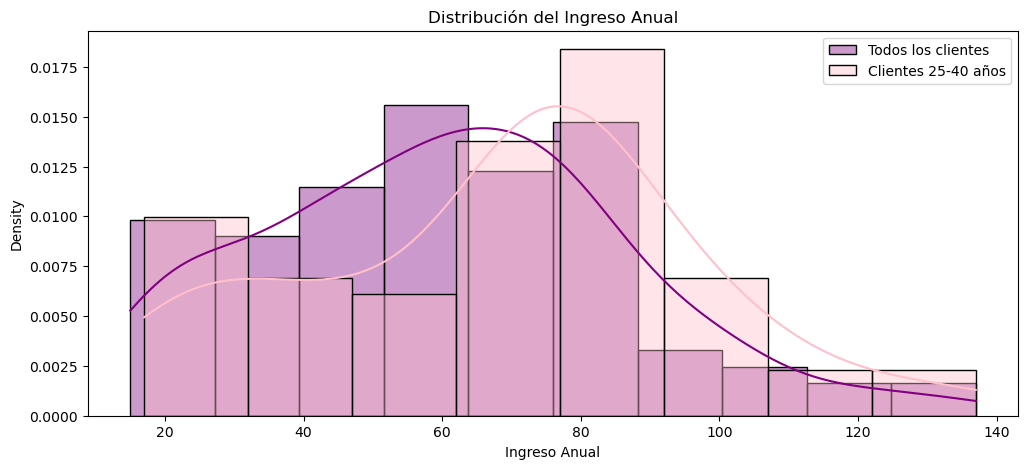

In [27]:
# Ingreso Anual
plt.figure(figsize=(12, 5))
sns.histplot(data=Mall, x='Ingreso Anual', color='purple', label='Todos los clientes', kde=True, stat="density", alpha=0.4)
# Hace un histograma con una donde en el eje Y se presenta la densidad y se superpone una linea continua suavizada con kde 
# El area bajo la curva se normaliza a 1 porque stat esta en density
sns.histplot(data=clientes_seleccionados, x='Ingreso Anual', color='pink', label='Clientes 25-40 años', kde=True, stat="density", alpha=0.4)
plt.title('Distribución del Ingreso Anual')
plt.legend()
plt.show()

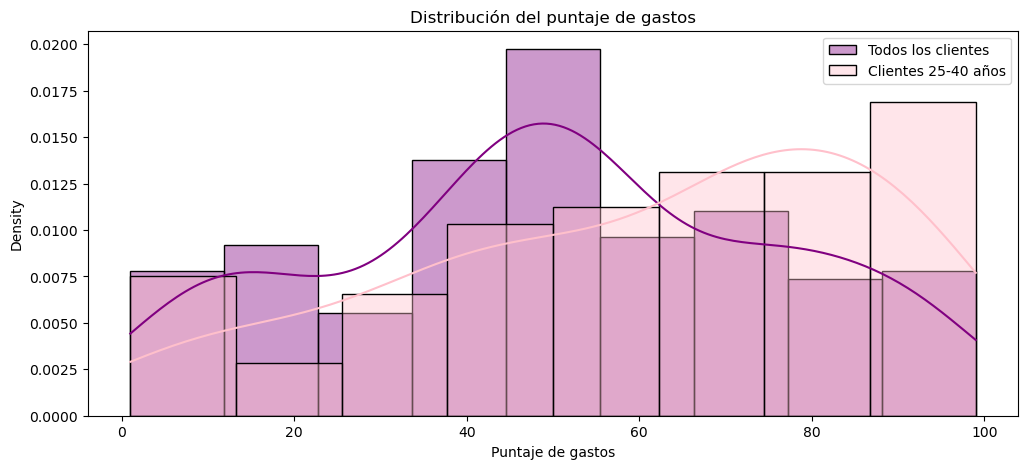

In [28]:
# Ingreso Anual
plt.figure(figsize=(12, 5))
sns.histplot(data=Mall, x='Puntaje de gastos', color='purple', label='Todos los clientes', kde=True, stat="density", alpha=0.4)
# Hace un histograma con una donde en el eje Y se presenta la densidad y se superpone una linea continua suavizada con kde 
# El area bajo la curva se normaliza a 1 porque stat esta en density
sns.histplot(data=clientes_seleccionados, x='Puntaje de gastos', color='pink', label='Clientes 25-40 años', kde=True, stat="density", alpha=0.4)
plt.title('Distribución del puntaje de gastos')
plt.legend()
plt.show()

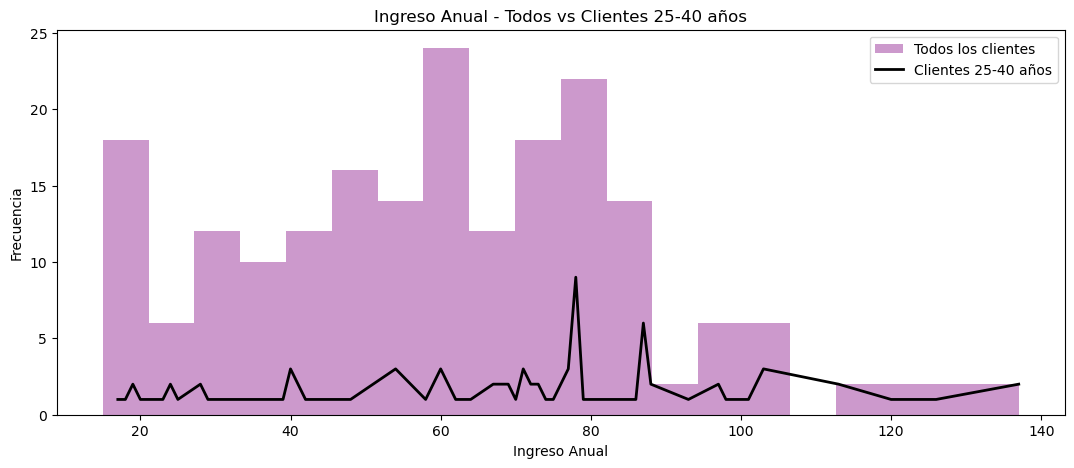

In [29]:
# Este es un histograma pero no esta normalizado, como se cuentan los valores de la cantidad de personas la linea de los clientes seleccionados
# va a ser comparativamente menor por la menor cantidad de datos
plt.figure(figsize=(13, 5)) 
plt.hist(Mall['Ingreso Anual'], bins=20, alpha=0.4, label='Todos los clientes', color='purple')
# bins=20: Divide el rango del ingreso anual en 20 intervalos (barras)
freqs = clientes_seleccionados['Ingreso Anual'].value_counts().sort_index()
plt.plot(freqs.index, freqs.values, label='Clientes 25-40 años', color='black', linewidth=2)
# value_counts() cuenta cuántas veces aparece cada valor de 'Ingreso Anual' en los clientes de 25 a 40 años.
# sort_index() asegura que los valores estén ordenados numéricamente para graficarlos correctamente.
# plt.plot(...) dibuja una línea que conecta esos puntos de frecuencia:
# freqs.index: los valores del ingreso anual.
# freqs.values: cuántas veces aparece cada valor.
plt.title('Ingreso Anual - Todos vs Clientes 25-40 años')
plt.xlabel('Ingreso Anual')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

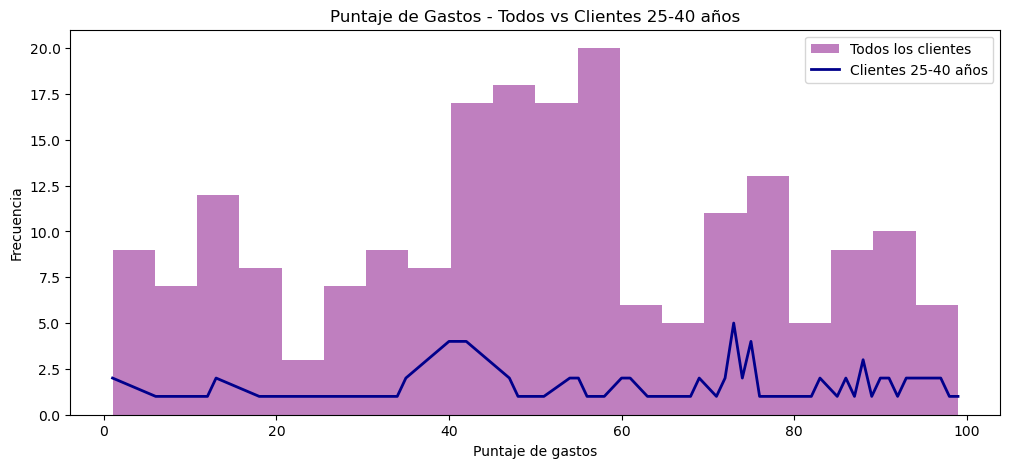

In [30]:
plt.figure(figsize=(12, 5))

# Histograma para todos
plt.hist(Mall['Puntaje de gastos'], bins=20, alpha=0.5, label='Todos los clientes', color='purple')

# Frecuencias de clientes seleccionados
freqs = clientes_seleccionados['Puntaje de gastos'].value_counts().sort_index()
plt.plot(freqs.index, freqs.values, label='Clientes 25-40 años', color='darkblue', linewidth=2)

plt.title('Puntaje de Gastos - Todos vs Clientes 25-40 años')
plt.xlabel('Puntaje de gastos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

**_Agrupa los datos por la variable `Genre` para ambos casos. Gráfica el ingreso promedio y su dispersion. Grafica, luego, el ingreso mediano y su rango intercuartil._**

In [31]:
Mall_Gen = Mall.groupby('Genre')['Ingreso Anual']
# El método .agg() en pandas se usa para aplicar una o más funciones de agregación a los datos luego de un .groupby().
print(Mall_Gen)

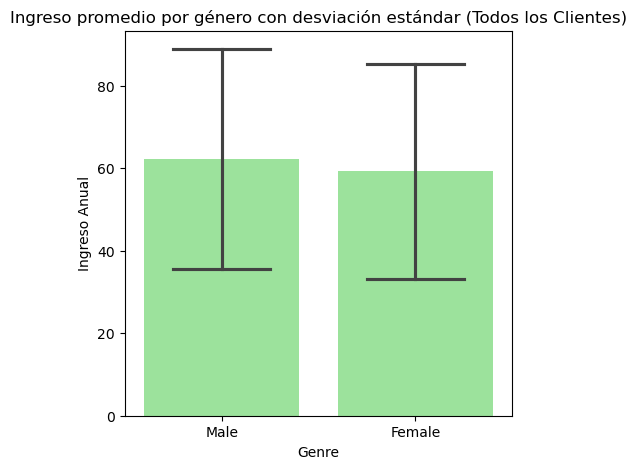

In [32]:
plt.figure(figsize=(5, 5))
sns.barplot(Mall, x='Genre', y='Ingreso Anual',errorbar ='sd', capsize=0.5, color = 'lightgreen')
# Esto genera un grafico de barras con el ingreso anual por genero y el error bar me da como se destribuyen los valores dentro del promedio 
plt.title('Ingreso promedio por género con desviación estándar (Todos los Clientes)')
plt.ylabel('Ingreso Anual')
plt.show()

In [33]:
Clientes_Gen = clientes_seleccionados.groupby('Genre')['Ingreso Anual']
Clientes_Gen

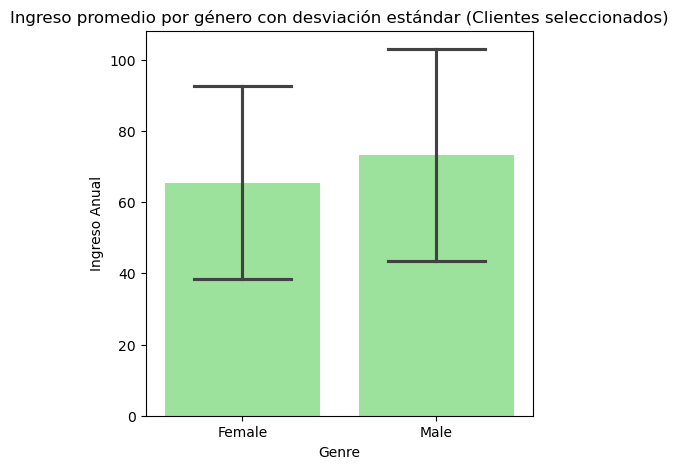

In [34]:
plt.figure(figsize=(5, 5))
sns.barplot(clientes_seleccionados, x='Genre', y='Ingreso Anual',errorbar ='sd', capsize=0.5, color = 'lightgreen')
# Esto genera un grafico de barras con el ingreso anual por genero y el error bar me da como se destribuyen los valores dentro del promedio 
plt.title('Ingreso promedio por género con desviación estándar (Clientes seleccionados)')
plt.ylabel('Ingreso Anual')
plt.show()

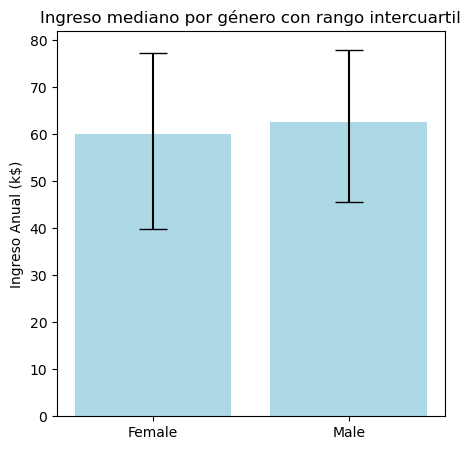

In [35]:
# Calcular mediana y IQR
q1 = Mall_Gen.quantile(0.25)
q2 = Mall_Gen.median()
q3 = Mall_Gen.quantile(0.75)

# Convertir a DataFrame
iqr_df = pd.DataFrame({
    'Genre': q2.index,
    'mediana': q2.values,
    'iqr_inferior': q2.values - q1.values,
    'iqr_superior': q3.values - q2.values
})

# Gráfico
plt.figure(figsize=(5, 5))
plt.bar(iqr_df['Genre'], iqr_df['mediana'], color='lightblue')
plt.errorbar(iqr_df['Genre'], iqr_df['mediana'],
             yerr=[iqr_df['iqr_inferior'], iqr_df['iqr_superior']],
             fmt='none', capsize=10, color='black')
plt.title('Ingreso mediano por género con rango intercuartil')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

In [36]:
print(iqr_df)

    Genre  mediana  iqr_inferior  iqr_superior
0  Female     60.0         20.25         17.25
1    Male     62.5         17.00         15.50


In [37]:
# Vamos a sacar el rango intercuartil y el medio de los clientes totales
q1c = Clientes_Gen.quantile(0.25)
q3c = Clientes_Gen.quantile(0.75)
q2c = Clientes_Gen.median()

🤔 &nbsp; **_¿Existe una correlación entre el sueldo anual y el puntaje de gastos en los clientes seleccionados? ¿Y en todos los clientes en general?_**

In [39]:
correlacion = clientes_seleccionados[['Ingreso Anual' , 'Puntaje de gastos']].corr()
print(correlacion)

                   Ingreso Anual  Puntaje de gastos
Ingreso Anual           1.000000           0.155003
Puntaje de gastos       0.155003           1.000000


Existe correlacion entre las variables y es positiva, cuando una crece la otra tambien en menos medida

**_Visualiza otros datos que creas relevantes para este analisis._**

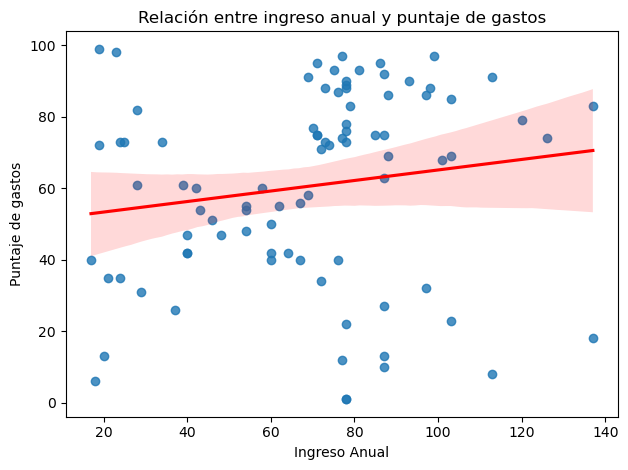

In [42]:
sns.regplot(data=clientes_seleccionados, x='Ingreso Anual', y='Puntaje de gastos', scatter=True, line_kws={"color": "red"})
plt.title('Relación entre ingreso anual y puntaje de gastos')
plt.tight_layout()
plt.show()

Tendencia débilmente positiva: La línea roja tiene una leve pendiente hacia arriba. Esto sugiere que a medida que aumenta el ingreso, el puntaje de gastos también tiende a aumentar, pero la relación no es muy fuerte

#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

Los siguientes pasos que vamos a tomar implican la transformación de los datos presentes en el dataset para un correcto ajuste de un modelo a elección. Para no tener que correr nuevamente todo el código, podemos guardar en un archivo `csv` el dataset tal cual lo tenemos ahora.

1) **Utiliza la función `.to_csv()` para guardar tu dataset**. Antes de hacerlo chequea la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

In [43]:
clientes_seleccionados.to_csv()

',CustomerID,Genre,Age,Ingreso Anual,Puntaje de gastos\r\n0,5,Female,31,17,40\r\n1,7,Female,35,18,6\r\n2,10,Female,30,19,72\r\n3,12,Female,35,19,99\r\n4,15,Male,37,20,13\r\n5,17,Female,35,21,35\r\n6,20,Female,35,23,98\r\n7,21,Male,35,24,35\r\n8,22,Male,25,24,73\r\n9,24,Male,31,25,73\r\n10,26,Male,29,28,82\r\n11,28,Male,35,28,61\r\n12,29,Female,40,29,31\r\n13,38,Female,30,34,73\r\n14,39,Female,36,37,26\r\n15,44,Female,31,39,61\r\n16,48,Female,27,40,47\r\n17,49,Female,29,40,42\r\n18,50,Female,31,40,42\r\n19,52,Male,33,42,60\r\n20,53,Female,31,43,54\r\n21,59,Female,27,46,51\r\n22,70,Female,32,48,47\r\n23,76,Male,26,54,54\r\n24,78,Male,40,54,48\r\n25,82,Male,38,54,55\r\n26,89,Female,34,58,60\r\n27,94,Female,40,60,40\r\n28,95,Female,32,60,42\r\n29,98,Female,27,60,50\r\n30,104,Male,26,62,55\r\n31,113,Female,38,64,42\r\n32,121,Male,27,67,56\r\n33,122,Female,38,67,40\r\n34,123,Female,40,69,58\r\n35,124,Male,39,69,91\r\n36,126,Female,31,70,77\r\n37,128,Male,40,71,95\r\n38,130,Male,38,71,75\r\n3